In [58]:
import pycountry
import pandas as pd
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt

df_countries = pd.read_csv("C:/Users/Iris/OneDrive/Desktop/Data/datasets/countries.csv")
df_countries

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [59]:
# Above we read in the data, and below we find a list of every unique country in the dataset. 

In [60]:
unique_countries = df_countries['country'].unique()
print(unique_countries)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria' 'Bahrain' 'Bangladesh' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Finland'
 'France' 'Gabon' 'Gambia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar

In [61]:
# Goal 1: Compare the population growth between two randomly picked countries, Canada and Venezuela.

In [62]:
cnda = df_countries[df_countries.country == 'Canada']
vzla = df_countries[df_countries.country == 'Venezuela']

In [63]:
cnda.population / cnda.population.iloc[0] * 100

240    100.000000
241    115.045534
242    128.407840
243    140.811259
244    150.717753
245    160.943254
246    170.449135
247    179.564771
248    192.914274
249    204.968860
250    215.766033
251    225.829030
Name: population, dtype: float64

In [64]:
vzla.population / vzla.population.iloc[0] * 100

1632    100.000000
1633    123.220594
1634    149.706282
1635    178.498587
1636    211.701536
1637    248.246975
1638    287.169238
1639    329.257434
1640    372.558317
1641    411.326745
1642    446.499979
1643    479.535544
Name: population, dtype: float64

In [65]:
# Mapping Canada and Venezuelas respective populations across time

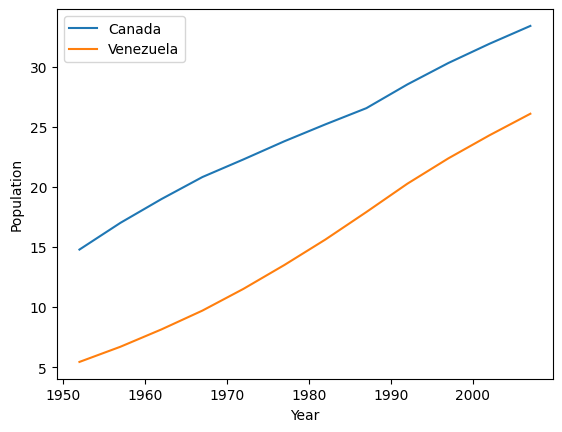

In [66]:
plt.plot(cnda.year, cnda.population / 10**6)
plt.plot(vzla.year, vzla.population / 10**6)
plt.legend(['Canada', 'Venezuela'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [67]:
# Mapping Canada and Venezuelas population growth across time, starting in 1952

In [68]:
def growth_rate(df_countries, country_name):
    # Total Growth Rate (tgr)
    countries_data = df_countries[df_countries['country'] == country_name].sort_values('year')

    if countries_data.empty:
        print(f"No data found for country: {country_name}. Check spelling or capitalization.")
        return None

    p_start = countries_data['population'].iloc[0]
    p_end = countries_data['population'].iloc[-1]
    tgr = ((p_end - p_start) / p_start) * 100

    # Average Annual Growth Rate (avg_annual)
    num_years = countries_data['year'].iloc[-1] - countries_data['year'].iloc[0]
    avg_annual = (p_end / p_start) ** (1 / num_years) - 1

    return{
        'country': country_name,
        'p_start': p_start,
        'p_end': p_end,
        'total_growth_pct': tgr,
        'avg_annual_pct': avg_annual * 100
    }

user_country = input("Enter a country name (Capitalized) and press enter to ascertain population growth: ")

result = growth_rate(df_countries, user_country)

if result:
    print(f"\nPopulation Growth for {result['country']}:\n")
    print(f"Starting population: {result['p_start']}\n")
    print(f"Ending population: {result['p_end']}\n")
    print(f"Total Growth: {result['total_growth_pct']: .2f}%\n")
    print(f"Average Annual Growth: {result['avg_annual_pct']: .2f}% per year\n")


Population Growth for Canada:

Starting population: 14785584

Ending population: 33390141

Total Growth:  125.83%

Average Annual Growth:  1.49% per year



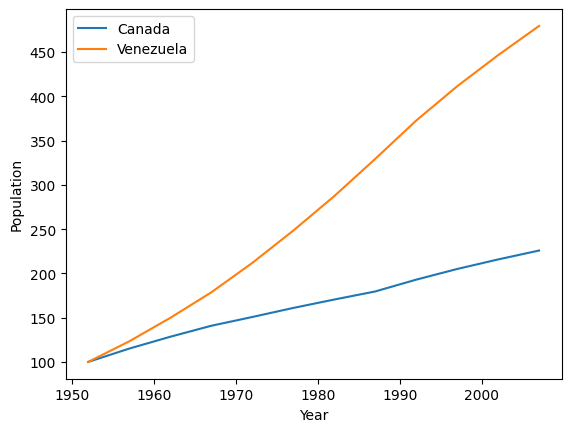

In [69]:
plt.plot(cnda.year, cnda.population / cnda.population.iloc[0] * 100)
plt.plot(vzla.year, vzla.population / vzla.population.iloc[0] * 100)
plt.legend(['Canada', 'Venezuela'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [70]:
# The second mapping is helpful to demonstrate that although Canada and Venezuela originally appeared to have similar growth rates,
# in reality, Venezuela outpaces Canada almost immedietly after data collection begins. 
#
# Between 1952 and 2007, Venezuelas population grew about 380%, whilst Canada only maintained around 125% growth.
#
# This data does not include age specific populations, or else TFR (total fertility rate) of each country would be included. 

In [71]:
# Goal 2: Map the populations and the growth rates of the ten most populous countries. 

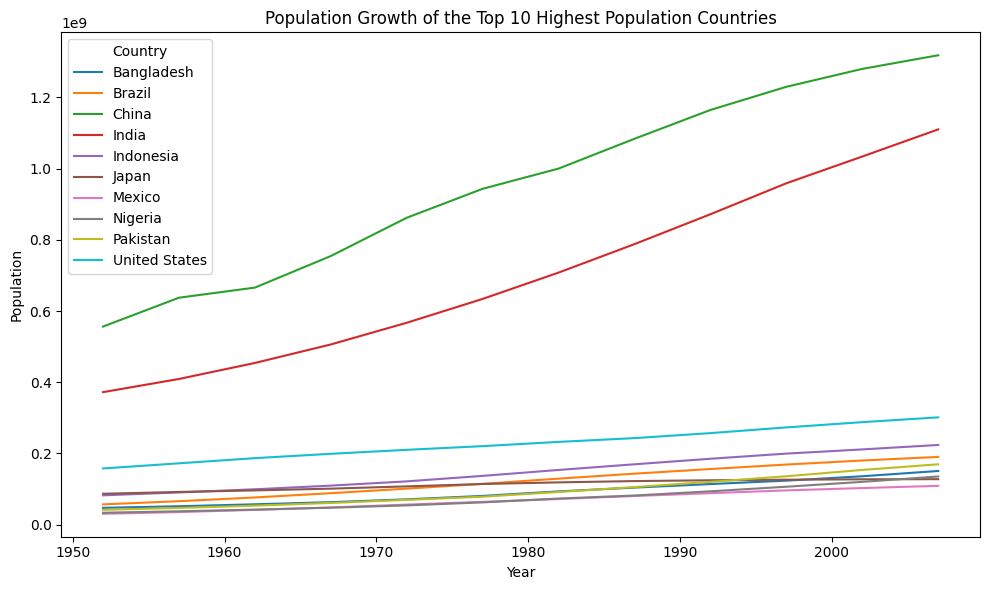

In [72]:
top_ten = df_countries.groupby("country")["population"].max().nlargest(10).index
tt_subset = df_countries[df_countries["country"].isin(top_ten)].copy()
tt_subset = tt_subset.sort_values(['country', 'year'])

plt.figure(figsize = (10, 6))
sns.lineplot(x = "year", y = "population", hue = "country", data = tt_subset)

plt.title("Population Growth of the Top 10 Highest Population Countries")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title = "Country")
plt.tight_layout()

In [73]:
# We can see here that above all, China and India are the highest population countries in this dataset by far,
# with the United States in third, and all others closely behind.
# But this doesn't tell us much about how fast individual countries are growing. Lets look into this more... 

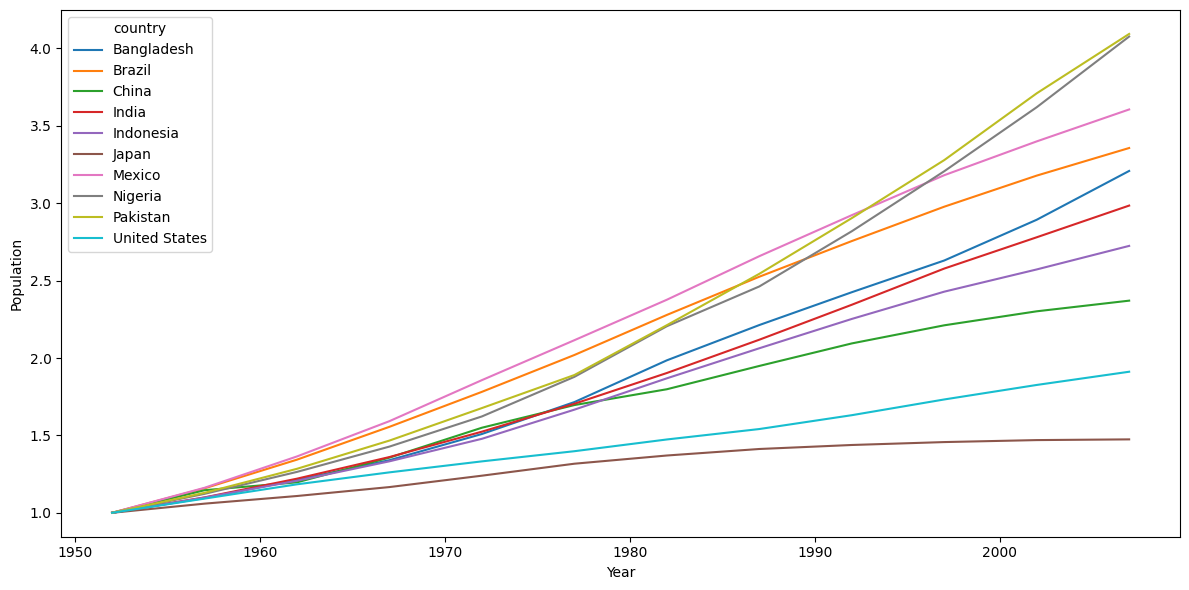

In [74]:
tt_growth = tt_subset.copy()

# Below is a similar normalization process as before, but instead of two set countries, to a whole group
tt_growth['Relative Population'] = (
    tt_growth.groupby('country')['population'].transform(lambda x: x / x.iloc[0])
)

plt.figure(figsize = (12,6))
sns.lineplot(x = 'year', y = 'Relative Population', hue = 'country', data = tt_growth)

plt.ylabel("Population")
plt.xlabel("Year")
plt.tight_layout()

In [75]:
# Although China and India were the most populous countries, Pakistan and Nigeria have the fastest increase in population (with Mexico and Brazil trailing just behind).

# What can we take from this?

# For one, having the largest population, or the fastest growth rate may not be ideal. Likewise, having a slowing growth may not be beneficial either.
# There are many factors that go into this, like food insecurity, an aging population, or systems incapable to accomadate rapid growth.

# From this, we can pinpoint which countries may be struggling from growth, and also which countries growths (like Japan), 
# have started declining, and cross-implement solutions to both sets of issues. 

# Basically, now we know where to look.

In [76]:
# Bored of line plots that reveal good information but aren't eye-catching? Let's change that, and map this all out. 

In [78]:
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None
    
df_countries['iso_alpha'] = df_countries['country'].apply(get_iso3)

mapping = px.scatter_geo(df_countries,
               locations = "iso_alpha",
               locationmode = "ISO-3",
               size = 'population',
               color = 'population',
               hover_name = 'country',
               animation_frame = 'year',
               projection = 'natural earth',
               color_continuous_scale = 'Plasma',
               title = "Global Population Growth Over Time",
               width = 1200,
               height = 700)

mapping.update_layout(geo=dict(showcoastlines=True, showland=True))
mapping.show()